# 로컬 선형 추세 모형

로컬 선형 추세 모형(local linear trend model)은 랜덤 워크 모형의 관측값이 다시 누적된 것이라고 볼 수 있다. 

이 모형은 상태 변수 $\beta_t, \mu_t$를 가진다.

$$
\begin{eqnarray}
\beta_t &=& \beta_{t-1} + w_{\beta,t} &,\;\;\; & w_{\beta,t} \sim N(0, \sigma_\beta^2) \\
\mu_t &=& \mu_{t-1} + \beta_{t-1} + w_{\mu,t} &,\;\;\; & w_{\mu,t} \sim N(0, \sigma_\mu^2) \\
Y_{t} &=& \mu_{t} + v_t &,\;\;\; & v_t \sim {N}(0, \sigma_v^2) \\
\end{eqnarray}
$$

이 수식을 행렬 방정식 형태로 쓰면 다음과 같다.

$$
\begin{bmatrix}
\beta_t \\ \mu_t
\end{bmatrix}
=
\begin{bmatrix}
1 & 0 \\
1 & 1 \\
\end{bmatrix}
\begin{bmatrix}
\beta_{t-1} \\ \mu_{t-1}
\end{bmatrix}
+
\begin{bmatrix}
w_{\beta,t} \\
w_{\mu,t}
\end{bmatrix}
$$

$$
Y_t=
\begin{bmatrix}
0 & 1
\end{bmatrix}
\begin{bmatrix}
\beta_{t} \\ \mu_{t}
\end{bmatrix}
+
v_t
$$

## ARIMA 모형과의 관계

로컬 선형 추세 모형은 다음과 같이 ARIMA 모형 형태로 변환할 수 있다.

$$ \mu_t = Y_t - v_t $$

$$ Y_t - v_t = Y_{t-1} - v_{t-1} + \beta_{t-1} + w_{\mu,t}  $$

$$ \Delta Y_t = Y_t - Y_{t-1} = \beta_{t-1} + w_{\mu,t} + v_t - v_{t-1} $$

$$ \beta_{t-1} = \Delta Y_t - w_{\mu,t} - v_t + v_{t-1} $$

$$ \Delta Y_{t+1} - w_{\mu,t+1} - v_{t+1} + v_{t} = \Delta Y_t - w_{\mu,t} - v_t + v_{t-1}  + w_{\beta,t} $$

$$ \Delta Y_{t+1} - \Delta Y_t = w_{\mu,t+1} + v_{t+1} - v_{t} - w_{\mu,t} - v_t + v_{t-1}  + w_{\beta,t} $$

$$ \Delta^2 Y_{t+1}  = w_{\mu,t+1} + v_{t+1} - v_{t} - w_{\mu,t} - v_t + v_{t-1}  + w_{\beta,t} $$

이 식에서 $\Delta Y_t$의 기댓값과 자기상관관계를 구하면 이 값에서 $\Delta^2 Y_t$는 MA(2) 모형을 따르고 $Y_t$는 ARIMA(0,2,2) 모형을 따르는 것을 알 수 있다. 즉 로컬 선형 추세 모형은 ARIMA(0,2,2)의 또 다른 표현(representation)이라고 볼 수 있다.

## 로컬 선형 추세 모형의 예 1

로컬 레벨 모형에서 설명한 배의 예를 다시 들어보자. 어떤 섬 근처에서 배가 엔진을 끄고 정지해 다가 어느 시점에 일정 속도로 움직이기 시작했다.

배의 속도 $\beta_t$는 일정하게 유지하고자 하지만 기관의 특성상 조금씩 속도의 변화가 누적될 수 있다. 이 속도 변화 $w_{\beta,t}$ 는 가우시안 정규 분포를 따른다고 가정하자. 

또한 배의 속도 $\beta_t$ 에 의해 배의 위치 $\mu_t$ 는 변화하게 되는데 이 경우에도 파도의 힘에 의해 조금씩 앞뒤로 위치가 바뀔 수 있고 이 미세한 위치 변화  $w_{\mu,t}$ 도 가우시안 정규 분포를 따른다고 가정하자. 

마지막으로 매 시간마다 배의 선원은 섬으로부터의 거리 $Y_t$를 배에 있는 초음파 거리계(ultrasonic range finder)로 측정한다. 초음파 거리계로 잰 값 $Y_t$는 가우시안 정규 분포에 따르는 오차를 가지고 있다는 것을 제조사 정보로부터 알고 있다.

이러한 경우에 정확한 거리 $\mu_t$를 알고자 하는 것이 로컬 선형 추세 모형의 필터링(filtering) 문제가 된다. 

로컬 선형 추세 모형은 오차가 큰 GPS 신호를 사용한 네비게이션에서 차량의 정확한 위치를 추정하는데도 사용된다.

## 로컬 선형 추세 모형의 예 2

실제로 로컬 선형 추세 모형을 사용하는 경우는 속도 변화가 거의 없는 경우 즉, $w_{\beta,t}$가 작은 경우가 많다. 이 경우에는 이름 그대로 $Y_t$값이 선형 추세에 가까운 모습을 보인다. 다만 추세의 기울기가 고정된 일반적인 선형 추세 모형에 비해 로컬 선형 추세는 추세가 국소적(local)으로만 유지된다고 가정하기 때문에 추세 자체가 조금씩 바뀔 수는 있다.

거시경제(macro economics) 모형에서 사용하는 대부분의 지표값은 시간이 지나며 선형적 혹은 지수함수적으로 증가하는 경우가 많다. 이러한 시계열 값은 모두 로컬 선형 추세 모형으로 모형화가 가능하다.

## 로컬 선형 추세 모형의 시뮬레이션

statsmodels의 `KalmanFilter` 클래스와 `UnobservedComponents` 클래스를 사용하여 로컬 선형 추세 모형을 따르는 시계열을 만들고 필터링을 해보자.

우선 `KalmanFilter` 클래스로 이론적인 로컬 선형 추세 모형을 만든다.

In [51]:
from statsmodels.tsa.statespace.kalman_filter import KalmanFilter

In [52]:
mod1 = KalmanFilter(k_states=2, k_endog=1, 
                    transition=[[1, 0], [1, 1]], 
                    state_intercept=[[0], [3]], 
                    selection=[[1, 0],[0, 1]], state_cov=[[1, 0],[0, 1]], 
                    design=[[0, 1]], obs_cov=[[500]])

In [53]:
np.random.seed(0)
y1, x1 = mod1.simulate(100)

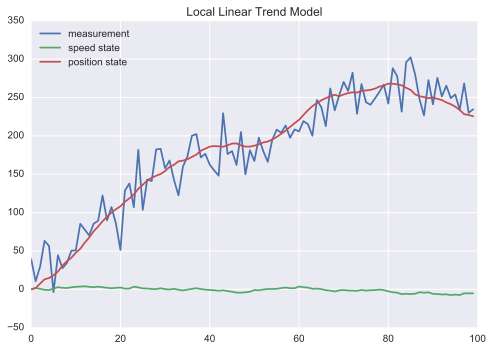

In [54]:
plt.plot(y1, label="measurement")
plt.plot(x1.T[0], label="speed state")
plt.plot(x1.T[1], label="position state")
plt.legend(loc=2)
plt.title("Local Linear Trend Model")
plt.show()

이제 칼만 필터링을 사용하여 상태변수를 추정하여 보자. `UnobservedComponents` 클래스를 사용하여 모형 추정까지 한 번에 수행할 수 있다.

In [55]:
mod1f = sm.tsa.UnobservedComponents(y1, 'local linear trend')
res1f = mod1f.fit()
print(res1f.summary())

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                  100
Model:             local linear trend   Log Likelihood                -454.188
Date:                Fri, 20 May 2016   AIC                            914.377
Time:                        00:34:47   BIC                            922.192
Sample:                             0   HQIC                           917.540
                                - 100                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular   455.8288     79.801      5.712      0.000     299.423     612.235
sigma2.level      2.022e-06     28.472    7.1e-08      1.000     -55.805      55.805
sigma2.trend         0.4817 

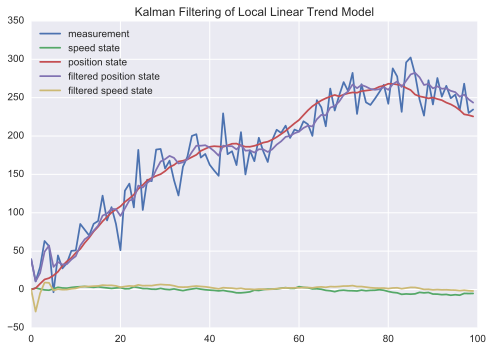

In [56]:
plt.plot(y1, label="measurement")
plt.plot(x1.T[0], label="speed state")
plt.plot(x1.T[1], label="position state")
plt.plot(res1f.filtered_state[0], label="filtered position state")
plt.plot(res1f.filtered_state[1], label="filtered speed state")
plt.legend(loc=2)
plt.title("Kalman Filtering of Local Linear Trend Model")
plt.show()

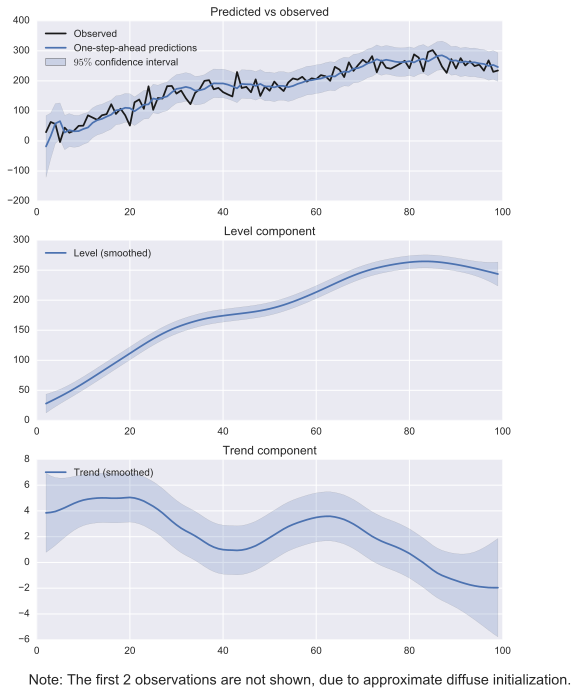

In [82]:
res1f.plot_components(legend_loc=2, figsize=(8,10))
plt.tight_layout(pad=3, h_pad=0.8)
plt.show()

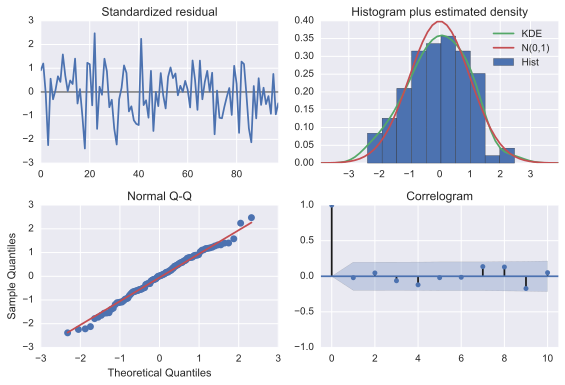

In [90]:
res1f.plot_diagnostics()
plt.tight_layout()
plt.show()

In [133]:
forecast = res1f.get_forecast(50)

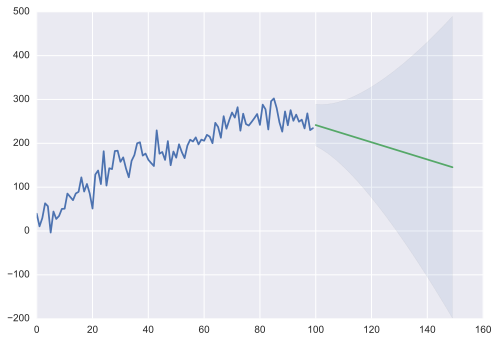

In [138]:
plt.plot(y1, label="measurement")
forecast_ci = forecast.conf_int()
forecast_index = np.arange(len(y1), len(y1) + len(forecast_ci))
plt.plot(forecast_index, forecast.predicted_mean, label="measurement")
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], alpha=0.1)
plt.show()